In [1]:
library(dplyr)
library(ggplot2)
library(data.table)
library(Hmisc)
library(MESS)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

Warning message:
"package 'Hmisc' was built under R version 3.5.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: geepack
Loading required package: geeM
Loading required package: Matrix


In [9]:
wea11 <- read.csv(file="C:/Users/Chen/Project/data/wea11.csv")

In [10]:
head(wea11)

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,FU,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCTS,Date2
1,2007-05-01,83,50,32,32,51,25,1,3,...,0,0,0,0,0,0,0,0,0,2007-05-01
1,2007-05-02,59,42,16,11,42,16,7,1,...,0,0,0,0,0,0,0,0,0,2007-05-02
1,2007-05-03,66,46,21,20,40,17,30,1,...,0,0,0,0,0,0,0,0,0,2007-05-03
1,2007-05-04,66,49,23,22,41,19,28,1,...,0,0,0,1,0,0,0,0,0,2007-05-04
1,2007-05-05,66,53,25,23,38,18,26,1,...,0,0,0,0,0,0,0,0,0,2007-05-05
1,2007-05-06,68,49,24,22,30,15,27,1,...,0,0,0,0,0,0,0,0,0,2007-05-06


In [11]:
dim(wea11)

[1] 1472   34

In [12]:
colnames(wea11)

[1] "Station"     "Date"        "Tmax"        "Tmin"        "Tavg"       
 [6] "Depart"      "DewPoint"    "WetBulb"     "Heat"        "Cool"       
[11] "Sunrise"     "Sunset"      "SnowFall"    "PrecipTotal" "StnPressure"
[16] "SeaLevel"    "ResultSpeed" "ResultDir"   "AvgSpeed"    "BCFG"       
[21] "BR"          "DZ"          "FG"          "FG."         "FU"         
[26] "HZ"          "MIFG"        "RA"          "SN"          "SQ"         
[31] "TS"          "TSRA"        "VCTS"        "Date2"

In [13]:
wea11$Date<- as.Date(wea11$Date, format = "%Y-%m-%d")

In [16]:
wea11$Date2<-NULL

In [17]:
str(wea11)

'data.frame':	1472 obs. of  33 variables:
 $ Station    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date       : Date, format: "2007-05-01" "2007-05-02" ...
 $ Tmax       : int  83 59 66 66 66 68 83 82 77 84 ...
 $ Tmin       : int  50 42 46 49 53 49 47 54 61 56 ...
 $ Tavg       : int  32 16 21 23 25 24 30 33 34 35 ...
 $ Depart     : int  32 11 20 22 23 22 28 30 31 32 ...
 $ DewPoint   : int  51 42 40 41 38 30 41 58 59 52 ...
 $ WetBulb    : int  25 16 17 19 18 15 23 31 32 29 ...
 $ Heat       : int  1 7 30 28 26 27 1 1 1 1 ...
 $ Cool       : int  3 1 1 1 1 1 1 4 5 6 ...
 $ Sunrise    : int  448 447 446 444 443 442 441 439 438 437 ...
 $ Sunset     : int  1849 1850 1851 1852 1853 1855 1856 1857 1858 1859 ...
 $ SnowFall   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ PrecipTotal: num  0 0 0 0 0 0 0 0 0.13 0 ...
 $ StnPressure: num  29.1 29.4 29.4 29.3 29.4 ...
 $ SeaLevel   : num  29.8 30.1 30.1 30.1 30.1 ...
 $ ResultSpeed: num  1.7 13 11.7 10.4 11.7 14.4 8.6 2.7 3.9 0.7 ...
 $ ResultDir  : int  27 4 7 

### Total number of raining days in the last 45 days
I see that there is only one station in this dataset, and there are 1472 rows.
The firs think you want is the sum of the raining (RA) days in the last 45 days. Take into account that there will be 45 missing values entered for the first 45 days.
We will use the xts (time series object) to create a TS for the actual date and the rain:

In [18]:
library(xts)
q <- wea11[,c("Date","RA")]
qxts <- xts(q[,"RA"], order.by=q[,"Date"])
names(qxts) <- "RA"

Warning message:
"package 'xts' was built under R version 3.5.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.5.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:data.table':

    first, last

The following objects are masked from 'package:dplyr':

    first, last



In [19]:
head(qxts)

           RA
2007-05-01  0
2007-05-02  0
2007-05-03  0
2007-05-04  1
2007-05-05  0
2007-05-06  0

In [20]:
library(quantmod)

qxts$RA45 = runSum(qxts$RA,n=45)
head(qxts,50)


Warning message:
"package 'quantmod' was built under R version 3.5.2"Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.5.2"Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: 'quantmod'

The following object is masked from 'package:Hmisc':

    Lag



           RA RA45
2007-05-01  0   NA
2007-05-02  0   NA
2007-05-03  0   NA
2007-05-04  1   NA
2007-05-05  0   NA
2007-05-06  0   NA
2007-05-07  1   NA
2007-05-08  0   NA
2007-05-09  0   NA
2007-05-10  0   NA
2007-05-11  0   NA
2007-05-12  0   NA
2007-05-13  0   NA
2007-05-14  0   NA
2007-05-15  1   NA
2007-05-16  1   NA
2007-05-17  0   NA
2007-05-18  0   NA
2007-05-19  0   NA
2007-05-20  1   NA
2007-05-21  0   NA
2007-05-22  0   NA
2007-05-23  0   NA
2007-05-24  1   NA
2007-05-25  0   NA
2007-05-26  1   NA
2007-05-27  1   NA
2007-05-28  1   NA
2007-05-29  0   NA
2007-05-30  0   NA
2007-05-31  1   NA
2007-06-01  0   NA
2007-06-02  1   NA
2007-06-03  1   NA
2007-06-04  1   NA
2007-06-05  1   NA
2007-06-06  1   NA
2007-06-07  0   NA
2007-06-08  0   NA
2007-06-09  0   NA
2007-06-10  0   NA
2007-06-11  0   NA
2007-06-12  0   NA
2007-06-13  0   NA
2007-06-14  0   15
2007-06-15  0   15
2007-06-16  1   16
2007-06-17  0   16
2007-06-18  1   16
2007-06-19  1   17

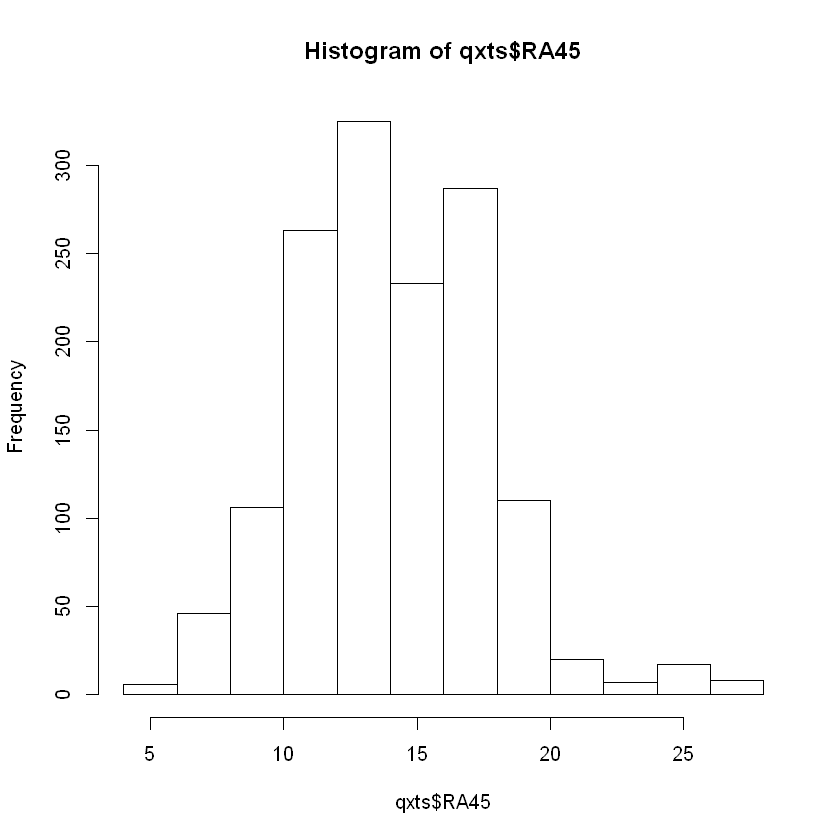

In [21]:
hist(qxts$RA45)

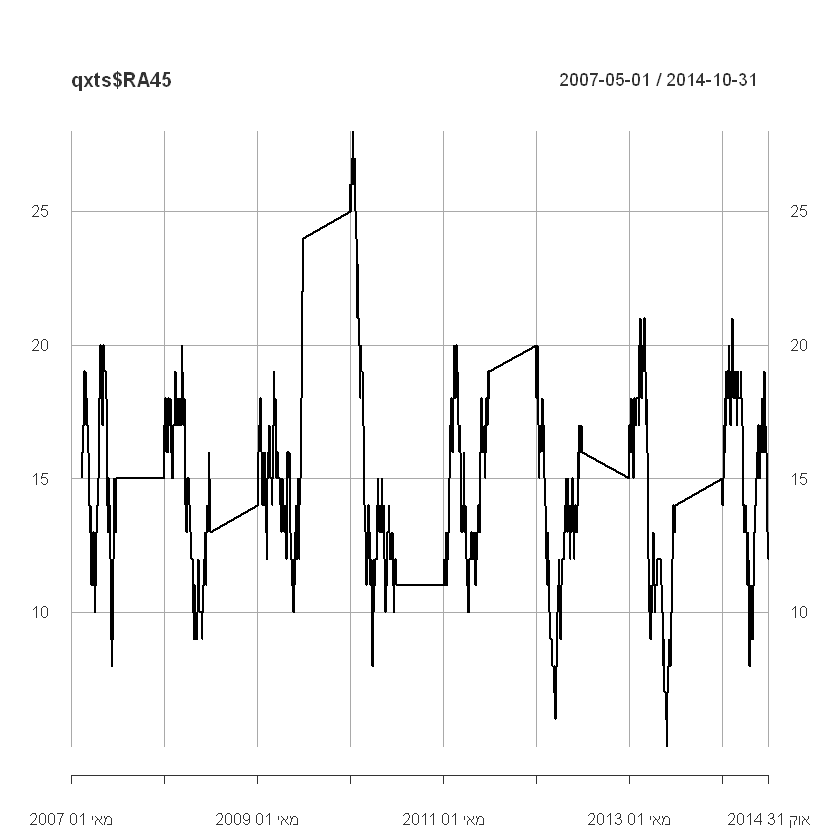

In [22]:
plot(qxts$RA45)

Now we have to reverse the TS to a dataframe and join with the original dataset

In [23]:
rain45 <- data.frame(qxts$RA45)
rain45$Date <- as.Date(rownames(rain45))
head(rain45)
str(rain45)

,RA45,Date
2007-05-01,NA,2007-05-01
2007-05-02,NA,2007-05-02
2007-05-03,NA,2007-05-03
2007-05-04,NA,2007-05-04
2007-05-05,NA,2007-05-05
2007-05-06,NA,2007-05-06


'data.frame':	1472 obs. of  2 variables:
 $ RA45: num  NA NA NA NA NA NA NA NA NA NA ...
 $ Date: Date, format: "2007-05-01" "2007-05-02" ...


In [25]:
wea11rain <- left_join(wea11, rain45, by="Date")
head(wea11rain,50)

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,FU,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCTS,RA45
1,2007-05-01,83,50,32,32,51,25,1,3,...,0,0,0,0,0,0,0,0,0,NA
1,2007-05-02,59,42,16,11,42,16,7,1,...,0,0,0,0,0,0,0,0,0,NA
1,2007-05-03,66,46,21,20,40,17,30,1,...,0,0,0,0,0,0,0,0,0,NA
1,2007-05-04,66,49,23,22,41,19,28,1,...,0,0,0,1,0,0,0,0,0,NA
1,2007-05-05,66,53,25,23,38,18,26,1,...,0,0,0,0,0,0,0,0,0,NA
1,2007-05-06,68,49,24,22,30,15,27,1,...,0,0,0,0,0,0,0,0,0,NA
1,2007-05-07,83,47,30,28,41,23,1,1,...,0,0,0,1,0,0,0,0,0,NA
1,2007-05-08,82,54,33,30,58,31,1,4,...,0,0,0,0,0,0,0,0,0,NA
1,2007-05-09,77,61,34,31,59,32,1,5,...,0,1,0,0,0,0,0,0,0,NA
1,2007-05-10,84,56,35,32,52,29,1,6,...,0,0,0,0,0,0,0,0,0,NA


write.csv(wea22.imp1, file="C:/Users/Chen/Project/data/wea22.imp1.csv", row.names =F)

### Create a variable indicating it in the last 45 days there was a total daily rain was higher than 50 

In [26]:
q <- wea11[,c("Date","PrecipTotal")]
qxts <- xts(q[,"PrecipTotal"], order.by=q[,"Date"])
names(qxts) <- "PrecipTotal"

In [27]:
head(qxts)

           PrecipTotal
2007-05-01           0
2007-05-02           0
2007-05-03           0
2007-05-04           0
2007-05-05           0
2007-05-06           0

In [29]:
qxts$PT45 = runMax(qxts$PrecipTotal,n=45)
qxts$PT45_gt05 <- ifelse(qxts$PT45>0.5,1,0)
head(qxts,50)


           PrecipTotal PT45 PT45_gt05
2007-05-01        0.00   NA        NA
2007-05-02        0.00   NA        NA
2007-05-03        0.00   NA        NA
2007-05-04        0.00   NA        NA
2007-05-05        0.00   NA        NA
2007-05-06        0.00   NA        NA
2007-05-07        0.00   NA        NA
2007-05-08        0.00   NA        NA
2007-05-09        0.13   NA        NA
2007-05-10        0.00   NA        NA
2007-05-11        0.00   NA        NA
2007-05-12        0.00   NA        NA
2007-05-13        0.00   NA        NA
2007-05-14        0.00   NA        NA
2007-05-15        0.38   NA        NA
2007-05-16        0.14   NA        NA
2007-05-17        0.00   NA        NA
2007-05-18        0.00   NA        NA
2007-05-19        0.00   NA        NA
2007-05-20        0.07   NA        NA
2007-05-21        0.00   NA        NA
2007-05-22        0.00   NA        NA
2007-05-23        0.00   NA        NA
2007-05-24        0.02   NA        NA
2007-05-25        0.00   NA        NA
2007-05-26  

Now we convert it to a dataframe and join it to the original dataset

In [30]:
rain45 <- data.frame(qxts$PT45_gt05)
rain45$Date <- as.Date(rownames(rain45))
head(rain45)
str(rain45)

,PT45_gt05,Date
2007-05-01,NA,2007-05-01
2007-05-02,NA,2007-05-02
2007-05-03,NA,2007-05-03
2007-05-04,NA,2007-05-04
2007-05-05,NA,2007-05-05
2007-05-06,NA,2007-05-06


'data.frame':	1472 obs. of  2 variables:
 $ PT45_gt05: num  NA NA NA NA NA NA NA NA NA NA ...
 $ Date     : Date, format: "2007-05-01" "2007-05-02" ...


In [32]:
wea11rain<- left_join(wea11rain, rain45,by="Date")
head(wea11rain,50)

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCTS,RA45,PT45_gt05
1,2007-05-01,83,50,32,32,51,25,1,3,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-02,59,42,16,11,42,16,7,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-03,66,46,21,20,40,17,30,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-04,66,49,23,22,41,19,28,1,...,0,0,1,0,0,0,0,0,NA,NA
1,2007-05-05,66,53,25,23,38,18,26,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-06,68,49,24,22,30,15,27,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-07,83,47,30,28,41,23,1,1,...,0,0,1,0,0,0,0,0,NA,NA
1,2007-05-08,82,54,33,30,58,31,1,4,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-09,77,61,34,31,59,32,1,5,...,1,0,0,0,0,0,0,0,NA,NA
1,2007-05-10,84,56,35,32,52,29,1,6,...,0,0,0,0,0,0,0,0,NA,NA


In [33]:
write.csv(wea11rain, file="C:/Users/Chen/Project/data/wea11rain.csv", row.names =F)

# Hope this will help you :-)